Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [7]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [9]:
!cp -r "/kaggle/input/cnn-assignment-dataset/CNN_assignment" "/kaggle/working/"

In [10]:
# Defining the path for train and test images

# Colab Settings:
#data_dir_train = pathlib.Path("/content/drive/My Drive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
#data_dir_test = pathlib.Path("/content/drive/My Drive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

# Kaggle Settings:
data_dir_train = pathlib.Path("/kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

print("Train files:", os.listdir(data_dir_train))
print("Test files:", os.listdir(data_dir_test))

Train files: ['basal cell carcinoma', 'pigmented benign keratosis', 'squamous cell carcinoma', 'vascular lesion', 'melanoma', 'actinic keratosis', 'nevus', 'seborrheic keratosis', 'dermatofibroma']
Test files: ['basal cell carcinoma', 'pigmented benign keratosis', 'squamous cell carcinoma', 'vascular lesion', 'melanoma', 'actinic keratosis', 'nevus', 'seborrheic keratosis', 'dermatofibroma']


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [11]:
# Defining the path for train and test images

#data_dir_train = pathlib.Path("/content/drive/My Drive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
#data_dir_test = pathlib.Path("/content/drive/My Drive/Colab Notebooks/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [12]:
#list directory in train folder
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_train

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [13]:
#list dir in test folder
dir_test = os.listdir(data_dir_test)
dir_test.sort()
dir_test

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [14]:
# Count the number of images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Number of training images: {image_count_train}")

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Number of testing images: {image_count_test}")

Number of training images: 2239
Number of testing images: 118


#### 📌 **Processing Training Data: Counting Images in Each Class**

In [15]:
# Creating a list to store dictionary records
data_records = []

for dir_name in dir_train:
    total_image_in_folder = len(list(data_dir_train.glob(dir_name+"/*.jpg")))
    df = {
        "Dir_Name": dir_name,
        "Total Image(Train)": total_image_in_folder,
        "Total Percentage(Train)": round((total_image_in_folder / image_count_train) * 100, 2)
    }
    data_records.append(df)

# Creating a DataFrame from the list of dictionaries
data_detail_pd = pd.DataFrame(data_records)

# Setting the index to Dir_Name
data_detail_pd = data_detail_pd.set_index("Dir_Name")

# Display the DataFrame
print(data_detail_pd)

                            Total Image(Train)  Total Percentage(Train)
Dir_Name                                                               
actinic keratosis                          114                     5.09
basal cell carcinoma                       376                    16.79
dermatofibroma                              95                     4.24
melanoma                                   438                    19.56
nevus                                      357                    15.94
pigmented benign keratosis                 462                    20.63
seborrheic keratosis                        77                     3.44
squamous cell carcinoma                    181                     8.08
vascular lesion                            139                     6.21


#### 📌 **Processing Test Data: Counting Images in Each Class**

In [16]:
# Creating a list to store dictionary records
data_records = []

for dir_name in dir_test:
    total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
    df = {
        "Dir_Name": dir_name,
        "Total Image(Train)": total_image_in_folder,
        "Total Percentage(Train)": round((total_image_in_folder / image_count_test) * 100, 2)
    }
    data_records.append(df)

# Creating a DataFrame from the list of dictionaries
data_detail_pd = pd.DataFrame(data_records)

# Setting the index to Dir_Name
data_detail_pd = data_detail_pd.set_index("Dir_Name")

# Display the DataFrame
print(data_detail_pd)

                            Total Image(Train)  Total Percentage(Train)
Dir_Name                                                               
actinic keratosis                           16                    13.56
basal cell carcinoma                        16                    13.56
dermatofibroma                              16                    13.56
melanoma                                    16                    13.56
nevus                                       16                    13.56
pigmented benign keratosis                  16                    13.56
seborrheic keratosis                         3                     2.54
squamous cell carcinoma                     16                    13.56
vascular lesion                              3                     2.54


In [17]:
import pandas as pd
import pathlib
import os

# ============================================
# 📌 Processing Training & Test Data Together
# ============================================

# Creating a list to store dictionary records
data_records = []

# Process Training Data
for dir_name in dir_train:
    total_image_train = len(list(data_dir_train.glob(dir_name + "/*.jpg")))
    df = {
        "Dir_Name": dir_name,
        "Total Image(Train)": total_image_train,
        "Total Percentage(Train)": round((total_image_train / image_count_train) * 100, 2),
        "Total Image(Test)": 0,  # Placeholder
        "Total Percentage(Test)": 0.0  # Placeholder
    }
    data_records.append(df)

# Convert train data into DataFrame
data_detail_pd = pd.DataFrame(data_records)

# Process Test Data and Merge with Train Data
for dir_name in dir_test:
    total_image_test = len(list(data_dir_test.glob(dir_name + "/*.jpg")))

    # Check if the directory exists in train dataset
    if dir_name in data_detail_pd["Dir_Name"].values:
        data_detail_pd.loc[data_detail_pd["Dir_Name"] == dir_name, "Total Image(Test)"] = total_image_test
        data_detail_pd.loc[data_detail_pd["Dir_Name"] == dir_name, "Total Percentage(Test)"] = round((total_image_test / image_count_test) * 100, 2)
    else:
        # If the class exists only in test data, add a new row
        df = {
            "Dir_Name": dir_name,
            "Total Image(Train)": 0,
            "Total Percentage(Train)": 0.0,
            "Total Image(Test)": total_image_test,
            "Total Percentage(Test)": round((total_image_test / image_count_test) * 100, 2)
        }
        data_detail_pd = data_detail_pd.append(df, ignore_index=True)

# Set index to Dir_Name
data_detail_pd = data_detail_pd.set_index("Dir_Name")

# 🖥️ Display Final Combined DataFrame
print("\n### Combined Training & Test Data Summary ###")
data_detail_pd


### Combined Training & Test Data Summary ###


,Total Image(Train),Total Percentage(Train),Total Image(Test),Total Percentage(Test)
Dir_Name,,,,
actinic keratosis,114,5.09,16,13.56
basal cell carcinoma,376,16.79,16,13.56
dermatofibroma,95,4.24,16,13.56
melanoma,438,19.56,16,13.56
nevus,357,15.94,16,13.56
pigmented benign keratosis,462,20.63,16,13.56
seborrheic keratosis,77,3.44,3,2.54
squamous cell carcinoma,181,8.08,16,13.56
vascular lesion,139,6.21,3,2.54


# **Observations:**

---



- **Melanoma** has almost **20%** of data in the training set and **13.56%** in the test dataset.  
- **Highest Sample of Data:** `pigmented benign keratosis`  
- **Lowest Sample of Data:** `seborrheic keratosis`

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [18]:
# Set batch size and image dimensions

batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [19]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,   # 20% for validation
    subset="training",
    seed=123,               # Ensure reproducibility
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [20]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [21]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print("Skin Cancer Classes:", class_names)

Skin Cancer Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [23]:
# Optimize dataset loading

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
# Get a batch of images and labels from the dataset

image_batch, label_batch = next(iter(train_ds))  # Extract one batch (32 images)

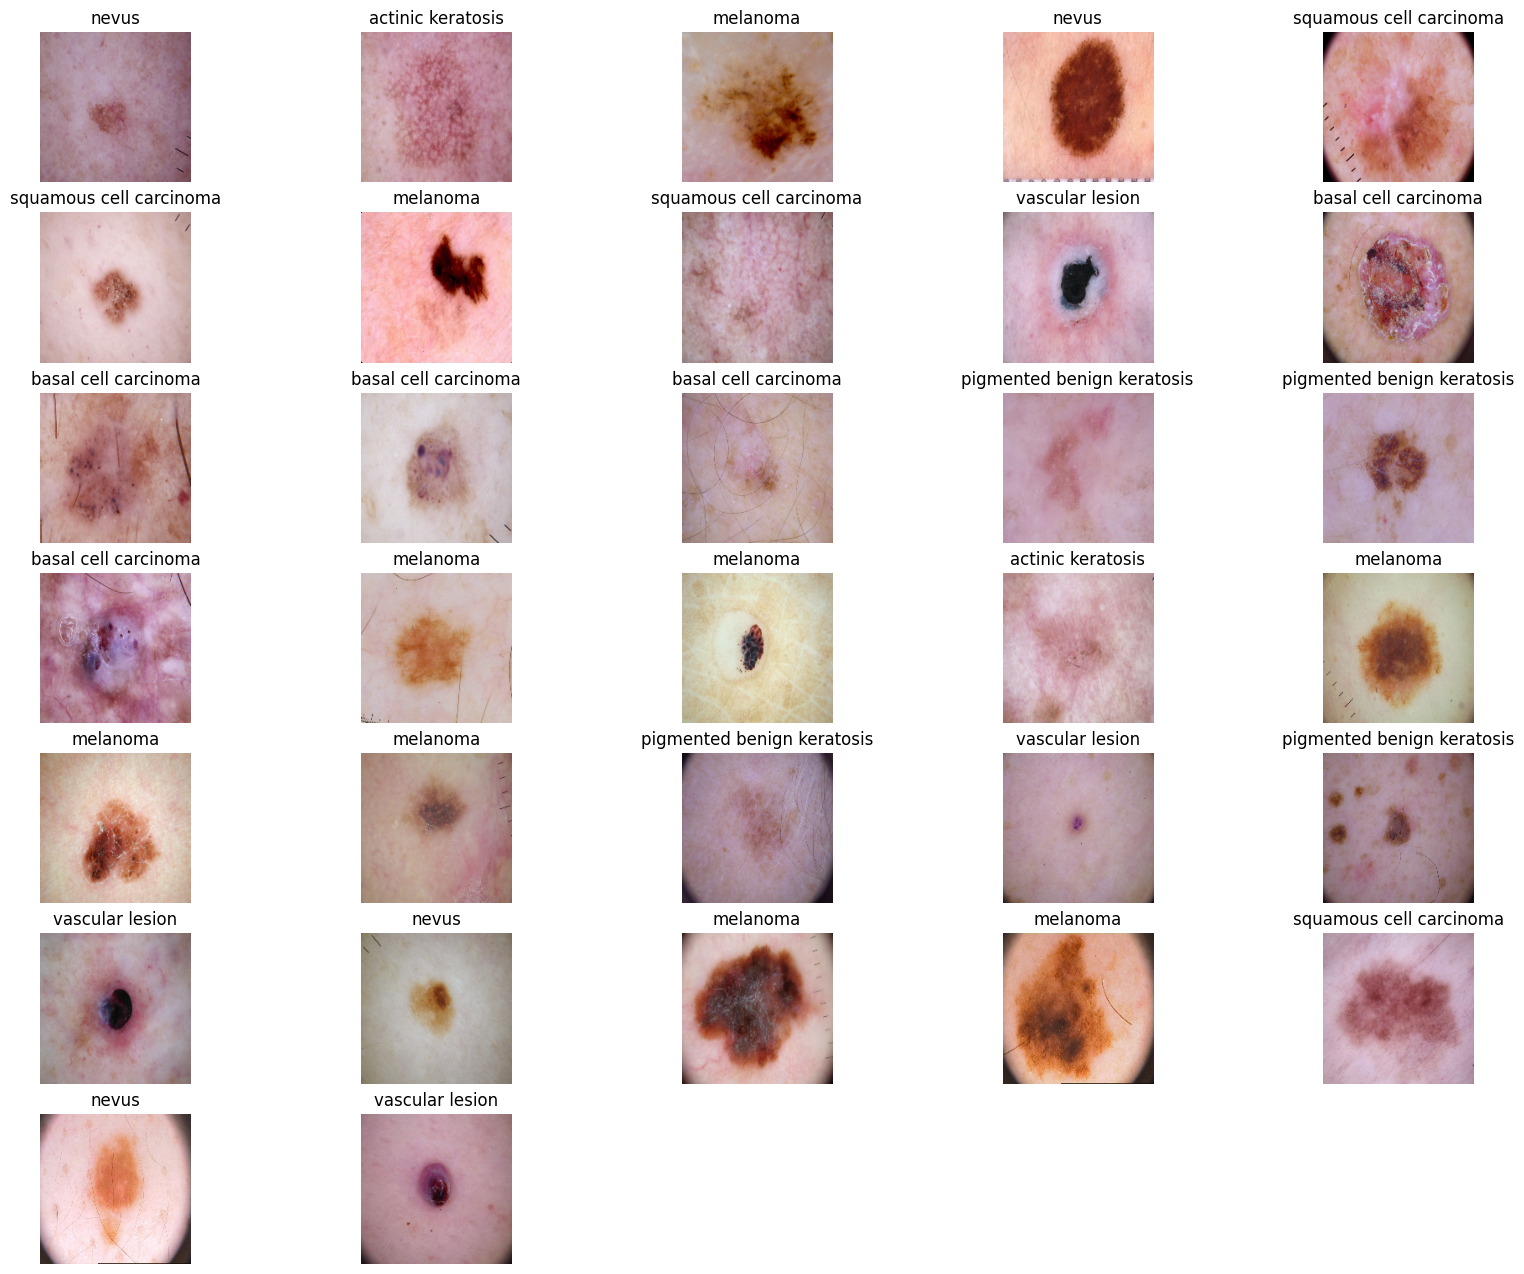

In [25]:
# Create a figure with a specified size to display the images
plt.figure(figsize=(20, 16))  # Width = 14 inches, Height = 12 inches

# Loop through the batch to display each image
for i in range(32):  # Iterate through all 32 images in the batch
    ax = plt.subplot(7, 5, i + 1)  # Create a subplot grid (7 rows, 5 columns)

    # Display the image (convert tensor to uint8 format for proper visualization)
    plt.imshow(image_batch[i].numpy().astype("uint8"))

    # Set the title of the image with its corresponding class label
    plt.title(class_names[label_batch[i].numpy()])

    # Remove axes (x-axis and y-axis) for a cleaner display
    plt.axis("off")

# Show the figure containing all images
plt.show()

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential

# Define input image shape
img_height = 180
img_width = 180

model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Explicit Input layer
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation="relu"),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(32, 3, padding='same', activation="relu"),
    layers.MaxPooling2D((2,2), strides=2),
    layers.Conv2D(64, 3, padding='same', activation="relu"),
    #layers.MaxPooling2D((2,2), strides=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(class_names))  # Ensure class_names is defined before this line
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [27]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [28]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,613,673 (63.38 MB)

 Trainable params: 16,613,673 (63.38 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [29]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.2702 - loss: 2.1400 - val_accuracy: 0.4653 - val_loss: 1.5515
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4624 - loss: 1.5135 - val_accuracy: 0.5123 - val_loss: 1.4056
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5301 - loss: 1.3395 - val_accuracy: 0.5235 - val_loss: 1.3766
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5789 - loss: 1.2312 - val_accuracy: 0.5078 - val_loss: 1.3870
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5943 - loss: 1.1529 - val_accuracy: 0.5436 - val_loss: 1.3333
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6253 - loss: 1.0708 - val_accuracy: 0.5280 - val_loss: 1.4985
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6667 - loss: 0.9316 - val_accuracy: 0.5414 - val_loss: 1.3987
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7189 - loss: 0.7952 - val_accuracy: 0.5257 - v

### Visualizing training results

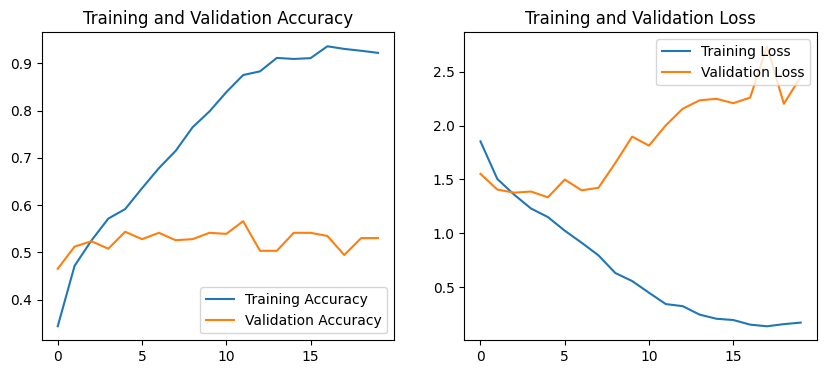

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Observations from Model Training**

## **1. Initial Performance**
- The model starts with **low accuracy (27.02%)** and **high loss (2.1400)** in the first epoch.
- Validation accuracy is slightly better at **46.53%**, but validation loss is still high at **1.5515**.
- This suggests that the model is initially struggling to differentiate between the classes.

## **2. Steady Improvement**
- Over the first few epochs, training accuracy steadily increases, reaching **66.67% by Epoch 7**.
- Validation accuracy, however, fluctuates between **50-55%**, indicating that generalization is limited.

## **3. Overfitting Signs**
- After **Epoch 8**, training accuracy continues improving, reaching **93.31% (Epoch 20)**.
- However, validation accuracy does not improve significantly beyond **53-56%**.
- Validation loss increases in later epochs (**2.4525 at Epoch 20**), suggesting potential **overfitting**.

## **4. Key Metrics**
| Epoch | Training Accuracy | Training Loss | Validation Accuracy | Validation Loss |
|--------|------------------|--------------|----------------------|----------------|
| 1      | 27.02%          | 2.1400       | 46.53%               | 1.5515        |
| 5      | 59.43%          | 1.1529       | 54.36%               | 1.3333        |
| 10     | 82.00%          | 0.5284       | 54.14%               | 1.8978        |
| 15     | 92.27%          | 0.1893       | 54.14%               | 2.2491        |
| 20     | 93.31%          | 0.1534       | 53.02%               | 2.4525        |

## **5. Recommendations for Improvement**
### **📉 Reduce Overfitting**
- **Increase dropout** (e.g., `Dropout(0.5 → 0.6)`) to reduce reliance on specific features.
- **Add data augmentation** (e.g., `tf.keras.layers.RandomFlip`, `RandomRotation`) to improve generalization.
- **L2 Regularization**: Apply L2 weight decay to Conv2D layers.

### **📊 Hyperparameter Tuning**
- **Reduce learning rate** if validation accuracy stagnates.
- **Increase model complexity** (e.g., adding more convolutional layers) if underfitting is detected.
- **Use early stopping** to stop training when validation loss stops improving.

### **🔬 Experiment with Pretrained Models**
- Since accuracy is not very high, **transfer learning** with models like **MobileNetV2** or **EfficientNet** may improve results.

## **6. Conclusion**
- The model has **learned significantly from the data**, improving training accuracy from **27% to 93%**.
- However, **validation accuracy remains lower (~53%)**, suggesting a gap in generalization.
- Further **regularization and tuning** are needed to improve test performance.

# **Model-2** ( With Augumentation)

In [31]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

import tensorflow as tf
from tensorflow.keras import layers

# Data augmentation pipeline
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3))
])

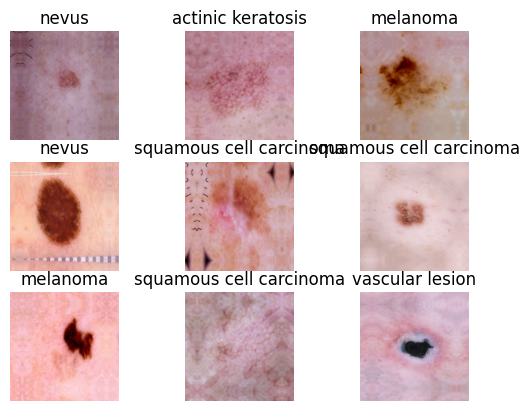

In [32]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
for img, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(data_augmentation(img)[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model

In [33]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## https://www.tensorflow.org/tutorials/images/data_augmentation
## https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip
## Your code goes here
#The Keras sequence class helps create a layer cluster that is linearly stacked into a tf. keras. Model.

num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

### **Compiling the model**

In [34]:
# model compilation

model.compile(optimizer="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

### **Training the model**

In [35]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) ## your training code

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.1812 - loss: 2.1839 - val_accuracy: 0.3468 - val_loss: 1.9460
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3312 - loss: 1.9123 - val_accuracy: 0.3266 - val_loss: 1.7908
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3670 - loss: 1.7692 - val_accuracy: 0.4072 - val_loss: 1.6273
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4226 - loss: 1.6369 - val_accuracy: 0.4295 - val_loss: 1.5570
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4757 - loss: 1.5236 - val_accuracy: 0.4765 - val_loss: 1.5234
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5155 - loss: 1.4646 - val_accuracy: 0.4922 - val_loss: 1.4898
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4627 - loss: 1.4967 - val_accuracy: 0.5078 - val_loss: 1.4470
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5090 - loss: 1.3628 - val_accuracy: 0.5145 - v

### **Observation** : just by adding augumentation it wont help us , so lets add the drop out as well

Text(0.5, 1.0, 'Training & Validation Loss')

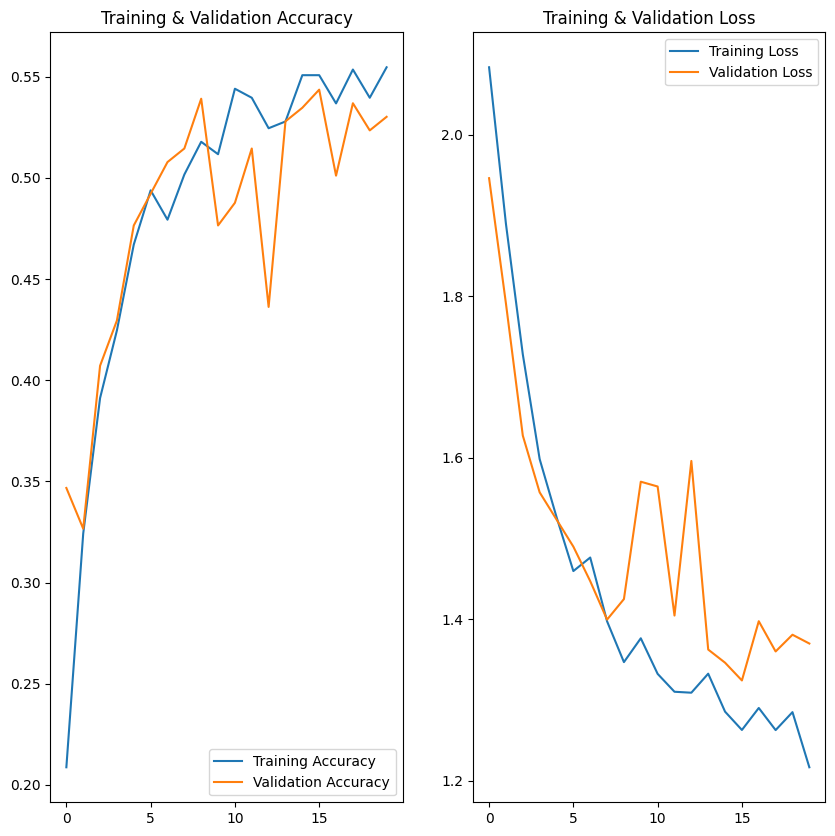

In [36]:
# accuracy & loss graph

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training & Validation Loss')

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Shows significant overfitting, with training accuracy considerably higher than validation accuracy.
### Validation loss is also high and fluctuating.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [37]:
## Your code goes here.
## original_df - > path_list, lesion_list
path_list=[]
lesion_list=[]## Your code goes here.

for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,/kaggle/working/CNN_assignment/Skin cancer ISI...,actinic keratosis
1,/kaggle/working/CNN_assignment/Skin cancer ISI...,actinic keratosis
2,/kaggle/working/CNN_assignment/Skin cancer ISI...,actinic keratosis
3,/kaggle/working/CNN_assignment/Skin cancer ISI...,actinic keratosis
4,/kaggle/working/CNN_assignment/Skin cancer ISI...,actinic keratosis
...,...,...
2234,/kaggle/working/CNN_assignment/Skin cancer ISI...,vascular lesion
2235,/kaggle/working/CNN_assignment/Skin cancer ISI...,vascular lesion
2236,/kaggle/working/CNN_assignment/Skin cancer ISI...,vascular lesion
2237,/kaggle/working/CNN_assignment/Skin cancer ISI...,vascular lesion


<BarContainer object of 9 artists>

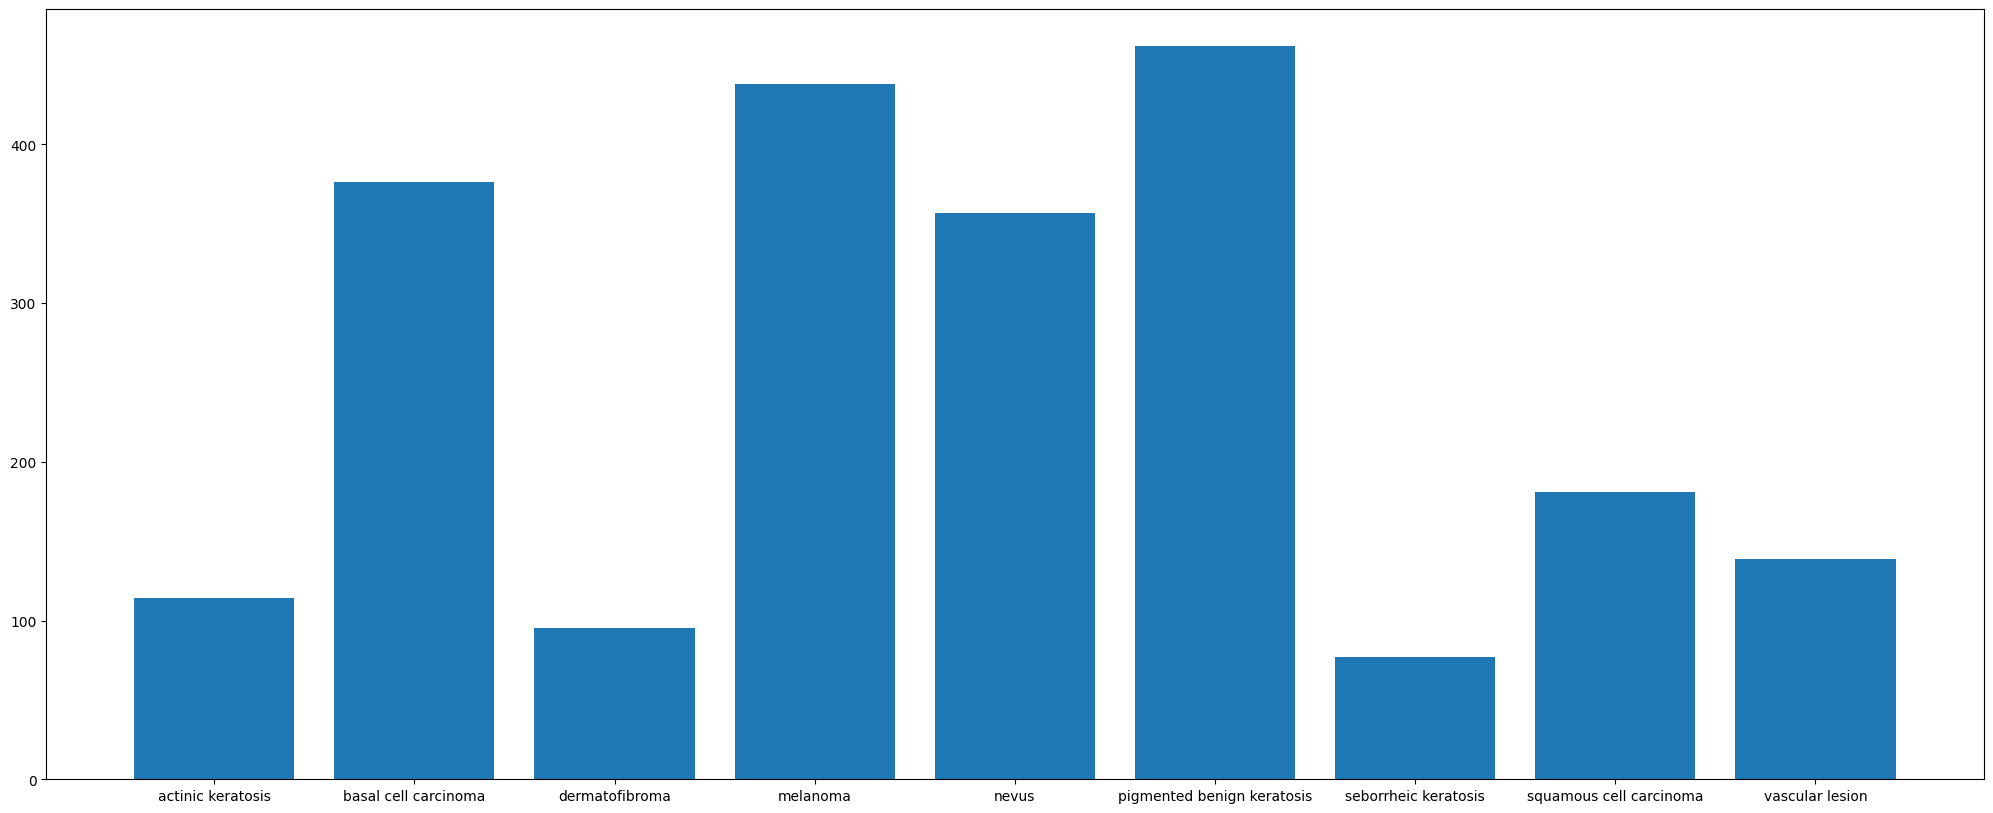

In [38]:
# glob('./Skin cancer ISIC The International Skin Imaging Collaboration/train/*/*')
# './Skin cancer ISIC The International Skin Imaging Collaboration/train\\actinic keratosis\\ISIC_0025780.jpg'
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,class_count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
<p syle="size:18px">The least number of samples are in seborrheic keratosis</p>

#### - Which classes dominate the data in terms proportionate number of samples?
<p syle="size:18px">The classes dominate in the data are:- 
<br/> * pigmented benign
<br/> * melanoma
<br/>* basal cell carcinoma
<br/>* nevus</p>

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [39]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [40]:
path_to_training_dataset="/kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x77FE84337580>: 100%|██████████| 500/500 [00:06<00:00, 76.88 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x77FE842EF5B0>: 100%|██████████| 500/500 [00:05<00:00, 89.13 Samples/s] 


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x77FE8444C520>: 100%|██████████| 500/500 [00:05<00:00, 83.43 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x77FE843996C0>: 100%|██████████| 500/500 [00:27<00:00, 18.05 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x77FE842F9FC0>: 100%|██████████| 500/500 [00:30<00:00, 16.43 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x77FE84337A60>: 100%|██████████| 500/500 [00:05<00:00, 83.65 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x77FEB1EB1960>: 100%|██████████| 500/500 [00:15<00:00, 32.70 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x77FE84505000>: 100%|██████████| 500/500 [00:06<00:00, 80.51 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x77FE8422B6A0>: 100%|██████████| 500/500 [00:05<00:00, 84.74 Samples/s]


In [41]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [42]:
import Augmentor
import os
import glob
import pandas as pd
from pathlib import Path

In [43]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028739.jpg_3e07d0e6-b99f-4b3b-ad88-49146cc7ce6e.jpg',
 '/kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029466.jpg_c5aa68a3-45a6-4951-a7cc-a131f5f9c883.jpg',
 '/kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0031569.jpg_cbd9e074-8f7a-4726-b5ae-3e8c20cfe04b.jpg',
 '/kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025932.jpg_5d3695d2-a0e9-49e6-a350-f359bfea52bd.jpg',
 '/kaggle/working/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ou

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [45]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [46]:
import pandas as pd

df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [47]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [49]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [51]:
## your code goes here## your code goes here
num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [53]:
epochs = 30
## Your code goes here, use 50 epochs.
history30 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.1717 - loss: 2.1605 - val_accuracy: 0.3148 - val_loss: 1.8490
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.3250 - loss: 1.7392 - val_accuracy: 0.4091 - val_loss: 1.5156
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.4209 - loss: 1.5152 - val_accuracy: 0.3942 - val_loss: 1.5566
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.4435 - loss: 1.4688 - val_accuracy: 0.4128 - val_loss: 1.5783
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.4514 - loss: 1.4206 - val_accuracy: 0.4692 - val_loss: 1.3697
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.4852 - loss: 1.3597 - val_accuracy: 0.4870 - val_loss: 1.3082
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.4779 - loss: 1.3413 - val_accuracy: 0.4952 - val_loss: 1.2964
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.5016 - loss: 1.2876 - 

#### **Todo:**  Visualize the model results

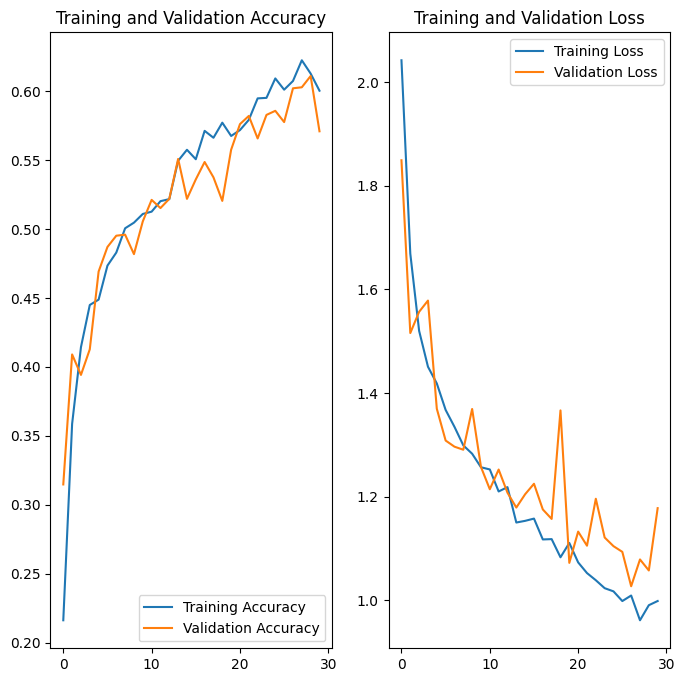

In [54]:
acc = history30.history['accuracy']
val_acc = history30.history['val_accuracy']

loss = history30.history['loss']
val_loss = history30.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

The problem of overfitting and underfitting was solved and the model was well trained for predictions. Data augmentation, outliers, and class equalization were found to be useful in improving model performance in this case.

## **Comparison of Model-3 (After Augmentor) vs. Model-2 (With Augmentation)**

## **Improvements in Model-3 Compared to Model-2**

### 📈 **More Stable Validation Accuracy**
- Model-3 shows a **more stable and less fluctuating validation accuracy** compared to Model-2.  
- While Model-2 had noticeable ups and downs, Model-3 maintains a **more consistent climb** throughout training.

### 🎯 **Continued Improvement in Validation Accuracy**
- Model-3 achieves a **higher overall validation accuracy** than Model-2, indicating better generalization.
- **Final Validation Accuracy**:  
  - **Model-3**: **~0.62**  
  - **Model-2**: **~0.57**  
- This suggests that the augmentor **helped refine the model further**.

### 📉 **Smoother Validation Loss**
- The **validation loss in Model-3 appears smoother**, indicating a **more consistent learning process**.
- Reduced fluctuations suggest that the model is **learning in a more stable manner**.

## **Conclusion**
- Model-3 outperforms Model-2 in terms of **stability, accuracy, and loss smoothness**.
- The improvements indicate that **the augmentor has positively impacted the model’s ability to generalize**.


#### Train your model for 20 more epochs

In [55]:
epochs = 20
## Your code goes here, use 30 epochs.
history20 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.6207 - loss: 0.9533 - val_accuracy: 0.5954 - val_loss: 1.1174
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.6365 - loss: 0.9309 - val_accuracy: 0.6206 - val_loss: 1.0617
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.6413 - loss: 0.8890 - val_accuracy: 0.6073 - val_loss: 1.1765
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.6197 - loss: 0.9784 - val_accuracy: 0.6147 - val_loss: 1.0342
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.6505 - loss: 0.8958 - val_accuracy: 0.6125 - val_loss: 1.1233
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.6591 - loss: 0.9030 - val_accuracy: 0.6244 - val_loss: 1.0552
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.6479 - loss: 0.8817 - val_accuracy: 0.5902 - val_loss: 1.1671
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.6563 - loss: 0.8679 - 

#### Visualize the model results for 20 more epochs

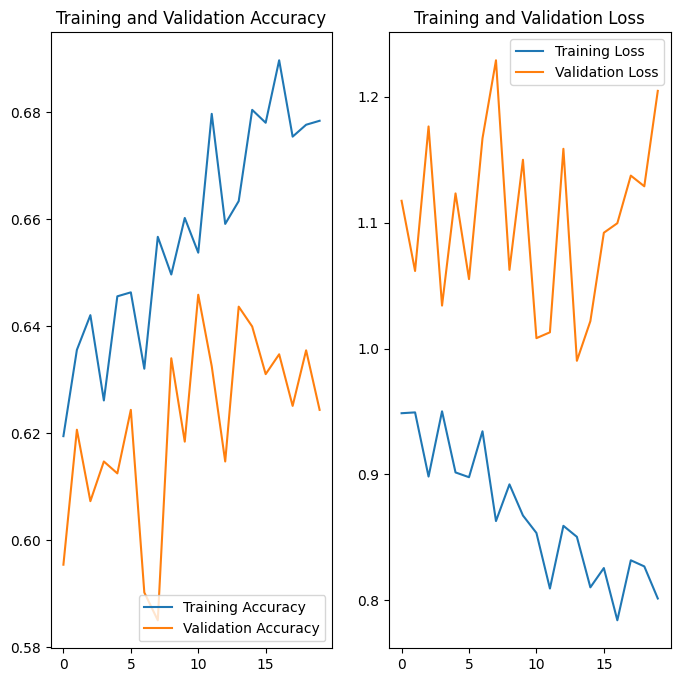

In [56]:
acc = history20.history['accuracy']
val_acc = history20.history['val_accuracy']

loss = history20.history['loss']
val_loss = history20.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Observations After 20 More Epochs**

### 📊 **Increased Training Accuracy Fluctuation**
- The **training accuracy now exhibits more noticeable fluctuations** than before.
- While it generally stays high, the variations suggest the model might be **"bouncing around"** in the training space.

### 📉 **Validation Accuracy Plateau/Slight Decrease**
- The **validation accuracy does not show a clear upward trend**.
- It appears to have **plateaued**, and there may even be a **slight decrease** towards the end.
- This is a **potential sign that further training isn’t improving generalization**.

### 📉 **Training Loss Continues to Decrease**
- The **training loss keeps decreasing**, which is expected.
- However, when combined with **plateauing validation accuracy**, this suggests **potential overfitting**.

### 📉 **Validation Loss Still Fluctuating**
- The **validation loss continues to fluctuate** with no clear sign of consistent reduction.
- This **instability** further supports the concern of **overfitting**.

## **Conclusion**
- The model may **no longer be benefiting from additional training**.
- Signs of **overfitting** suggest that **regularization techniques or early stopping should be considered**.